# Estatística Descritiva

Neste documento, ilustramos conceitos de estatísticas descritivas utilizando o conjunto de dados *Adult Income* da UCI. Abaixo, apresentamos exemplos em Python que cobrem os seguintes conceitos:
- média, 
- moda, 
- quantis, 
- variância
- desvio padrão.



In [18]:
# pip install pandas

In [19]:
# Descriptive Statistics Using the Adult Income Dataset

## 1. Loading the Dataset

import pandas as pd

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
           'marital_status', 'occupation', 'relationship', 'race', 
           'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 
           'native_country', 'income']

df = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)

In [20]:
# Display the first few rows
print(df.head())

   age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

## Média

A média é o valor médio de uma coluna numérica. Vamos calcular a média da idade dos indivíduos no conjunto de dados.

In [21]:
mean_age = df['age'].mean()
print(f"Mean age: {mean_age}")

Mean age: 38.58164675532078


## Mediana

A mediana é o valor central de um conjunto de dados ordenado. Vamos calcular a mediana das horas trabalhadas por semana pelos indivíduos.

In [22]:
median_hours_per_week = df['hours_per_week'].median()
print(f"Median hours per week: {median_hours_per_week}")

Median hours per week: 40.0



## Moda

A moda é o valor que aparece com mais frequência. Vamos encontrar a moda para a coluna \texttt{workclass}.

In [23]:
mode_workclass = df['workclass'].mode()[0]
print(f"Mode of workclass: {mode_workclass}")

Mode of workclass: Private


## Quantis

Quantis são pontos de corte que dividem o intervalo de um conjunto de dados em intervalos contínuos com probabilidades iguais. Vamos calcular os quartis (quantis 0,25; 0,5; 0,75) para a coluna `fnlwgt`.

In [24]:
quantiles_fnlwgt = df['fnlwgt'].quantile([0.25, 0.5, 0.75])
print("Quantiles for fnlwgt:")
print(quantiles_fnlwgt)


Quantiles for fnlwgt:
0.25    117827.0
0.50    178356.0
0.75    237051.0
Name: fnlwgt, dtype: float64



## Variância

A variância mede a dispersão dos pontos de dados em relação à média. Vamos calcular a variância da idade.

In [25]:

variance_age = df['age'].var()
print(f"Variance of age: {variance_age}")

Variance of age: 186.0614002488016



## Desvio Padrão

O desvio padrão é a raiz quadrada da variância, fornecendo uma medida da distância média de cada ponto de dados em relação à média. Vamos calcular o desvio padrão das horas trabalhadas por semana.

In [26]:
std_hours_per_week = df['hours_per_week'].std()
print(f"Standard deviation of hours per week: {std_hours_per_week}")

Standard deviation of hours per week: 12.347428681731843


## Intervalo Interquartil (IQR)

O intervalo interquartil (IQR) é a diferença entre o primeiro quartil (percentil 25) e o terceiro quartil (percentil 75). Ele pode ser calculado para qualquer coluna numérica. Aqui está como calculá-lo para \texttt{capital\_gain}.

In [27]:
Q1 = df['capital_gain'].quantile(0.25)
Q3 = df['capital_gain'].quantile(0.75)
IQR = Q3 - Q1
print(f"Interquartile Range (IQR) of capital gain: {IQR}")

Interquartile Range (IQR) of capital gain: 0.0


## Assimetria (Skewness)

Assimetria é uma medida que descreve a simetria de uma distribuição, ou mais especificamente, a falta de simetria. Ela indica se os dados estão inclinados para a direita ou para a esquerda da média. A assimetria pode ser:

- Assimetria Positiva: A cauda à direita da distribuição é mais longa ou mais estendida. A maioria dos valores está concentrada à esquerda da média, e há alguns valores muito altos que puxam a média para cima.

- Assimetria Negativa: A cauda à esquerda da distribuição é mais longa ou mais estendida. A maioria dos valores está concentrada à direita da média, e há alguns valores muito baixos que puxam a média para baixo.

- Simetria: Quando a distribuição é simétrica, ou seja, a cauda à direita e à esquerda são aproximadamente iguais. Neste caso, a assimetria é próxima de zero.

Vamos calcular a assimetria da variável `capital_gain`.

In [28]:

skewness_capital_gain = df['capital_gain'].skew()
print(f"Skewness of capital gain: {skewness_capital_gain}")

Skewness of capital gain: 11.953847687699799


Ao executar o código abaixo, você verá três gráficos:

- Distribuição Simétrica: Representa uma distribuição onde os dados são distribuídos igualmente ao redor da média, com uma assimetria próxima de zero.

- Distribuição com Assimetria Positiva: Mostra uma distribuição onde a cauda é mais longa à direita, indicando que há uma concentração maior de valores menores.

- Distribuição com Assimetria Negativa: Mostra uma distribuição onde a cauda é mais longa à esquerda, indicando que há uma concentração maior de valores maiores.

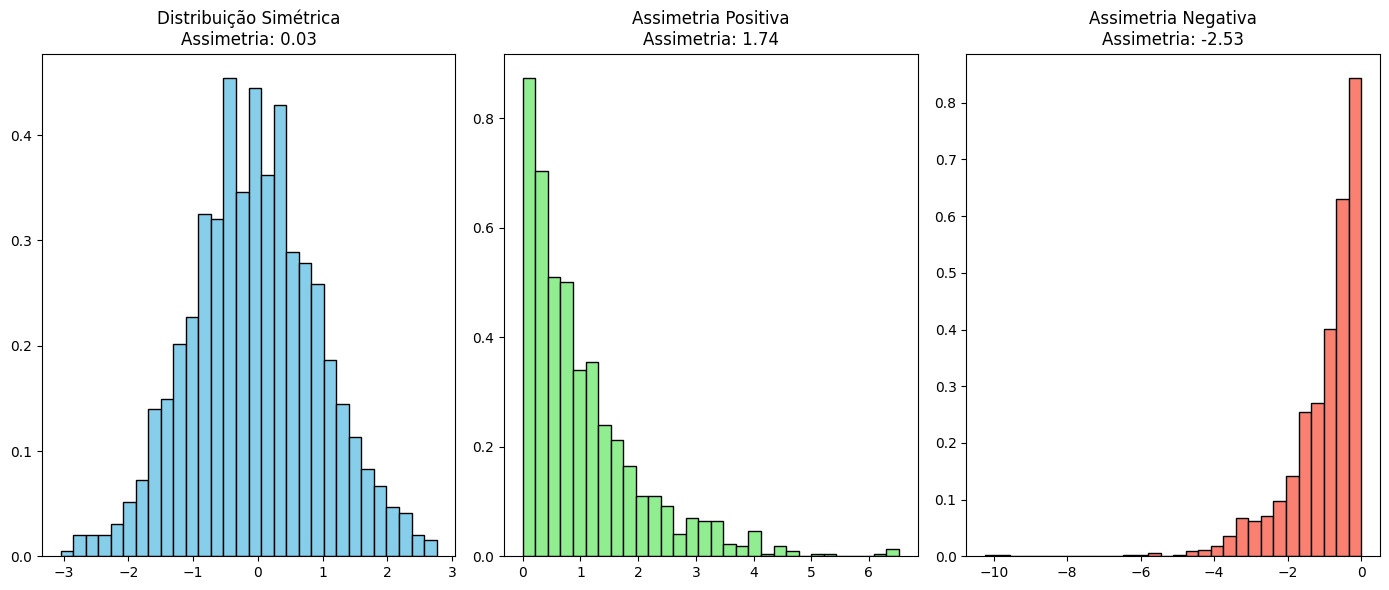

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Gerar dados de distribuições com diferentes níveis de assimetria
np.random.seed(0)
data_symmetric = np.random.normal(0, 1, 1000)  # Simétrica (assimetria ≈ 0)
data_positive_skew = np.random.exponential(1, 1000)  # Assimetria positiva
data_negative_skew = -np.random.exponential(1, 1000)  # Assimetria negativa

# Calcular assimetria
skew_symmetric = skew(data_symmetric)
skew_positive = skew(data_positive_skew)
skew_negative = skew(data_negative_skew)

# Plotar os gráficos
plt.figure(figsize=(14, 6))

# Gráfico da distribuição simétrica
plt.subplot(1, 3, 1)
plt.hist(data_symmetric, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title(f'Distribuição Simétrica\nAssimetria: {skew_symmetric:.2f}')

# Gráfico da distribuição com assimetria positiva
plt.subplot(1, 3, 2)
plt.hist(data_positive_skew, bins=30, color='lightgreen', edgecolor='black', density=True)
plt.title(f'Assimetria Positiva\nAssimetria: {skew_positive:.2f}')

# Gráfico da distribuição com assimetria negativa
plt.subplot(1, 3, 3)
plt.hist(data_negative_skew, bins=30, color='salmon', edgecolor='black', density=True)
plt.title(f'Assimetria Negativa\nAssimetria: {skew_negative:.2f}')

plt.tight_layout()
plt.show()


##  Curtose (Kurtosis)

Curtose é uma medida da "tailedness" (caudas) de uma distribuição, ou seja, da presença de outliers (valores extremos) em uma distribuição. Ela descreve a forma das caudas em relação à distribuição normal (que tem uma curtose de 0). A curtose é classificada em três tipos principais:

- Mesocúrtica: Distribuições com curtose próxima de 0, similar à distribuição normal.
- Leptocúrtica: Distribuições com caudas mais pesadas e um pico mais alto que a normal, indicando uma curtose positiva. Essas distribuições têm mais probabilidade de produzir valores extremos.
- Platicúrtica: Distribuições com caudas mais leves e um pico mais baixo que a normal, indicando uma curtose negativa. Essas distribuições têm menos probabilidade de produzir valores extremos.

Uma alta curtose em um conjunto de dados é um indicador de que os dados têm caudas longas ou outliers. 

Vamos calcular a curtose para `capital_loss`.

In [30]:
kurtosis_capital_loss = df['capital_loss'].kurtosis()
print(f"Kurtosis of capital loss: {kurtosis_capital_loss}")

Kurtosis of capital loss: 20.3768017134122


Ao executar este código, você verá três gráficos, cada um representando uma distribuição com um nível diferente de curtose. Isso ajuda a visualizar como a curtose afeta a forma da distribuição, particularmente em termos de "caudas" e "picos".

- Distribuição Normal: A distribuição normal tem uma curtose próxima de 0, indicando que sua cauda tem uma quantidade de dados semelhante à de uma distribuição normal teórica.

- Distribuição Leptocúrtica: A distribuição leptocúrtica tem alta curtose, o que significa que tem caudas mais pesadas e um pico mais acentuado do que a distribuição normal.

- Distribuição Platicúrtica: A distribuição platicúrtica tem baixa curtose, com caudas mais leves e um pico mais achatado do que a distribuição normal.

Para ilustrar graficamente o conceito de curtose, vamos criar gráficos comparando distribuições com diferentes níveis de curtose usando Python. 

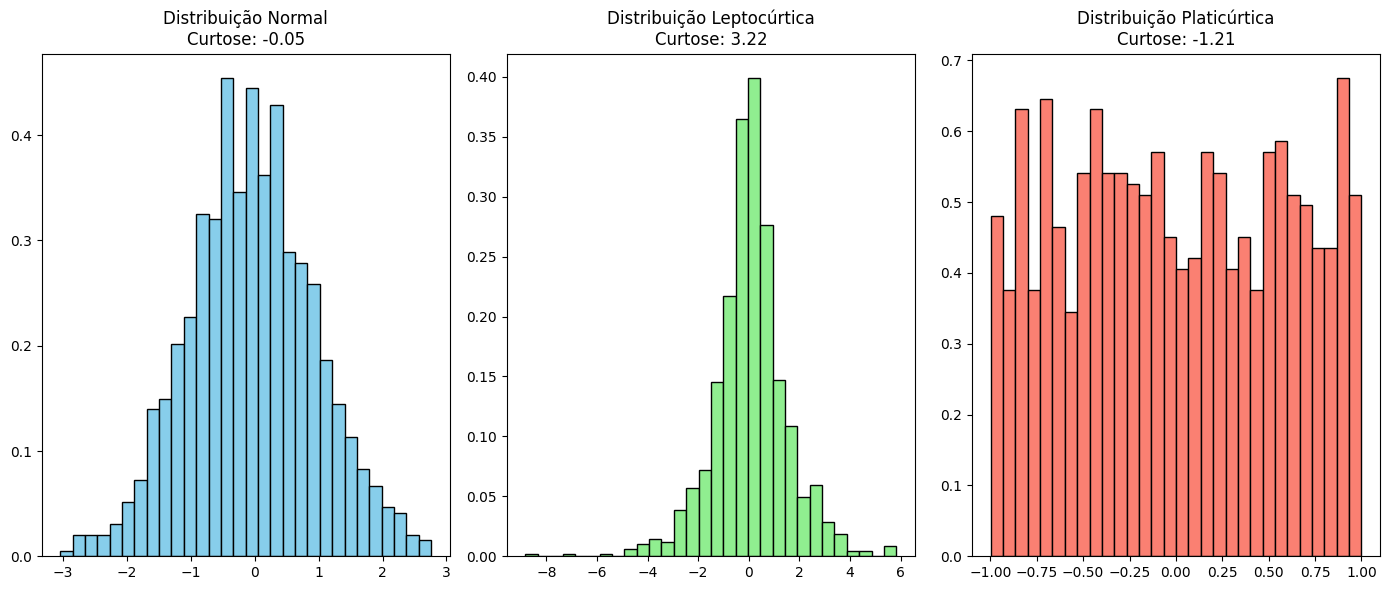

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, norm

# Gerar dados de distribuições normais com diferentes níveis de curtose
np.random.seed(0)
data_normal = np.random.normal(0, 1, 1000)
data_leptokurtic = np.random.laplace(0, 1, 1000)  # Alta curtose (leptocúrtica)
data_platykurtic = np.random.uniform(-1, 1, 1000)  # Baixa curtose (platicúrtica)

# Calcular curtose
kurt_normal = kurtosis(data_normal)
kurt_leptokurtic = kurtosis(data_leptokurtic)
kurt_platykurtic = kurtosis(data_platykurtic)

# Plotar os gráficos
plt.figure(figsize=(14, 6))

# Gráfico da distribuição normal
plt.subplot(1, 3, 1)
plt.hist(data_normal, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title(f'Distribuição Normal\nCurtose: {kurt_normal:.2f}')

# Gráfico da distribuição leptocúrtica
plt.subplot(1, 3, 2)
plt.hist(data_leptokurtic, bins=30, color='lightgreen', edgecolor='black', density=True)
plt.title(f'Distribuição Leptocúrtica\nCurtose: {kurt_leptokurtic:.2f}')

# Gráfico da distribuição platicúrtica
plt.subplot(1, 3, 3)
plt.hist(data_platykurtic, bins=30, color='salmon', edgecolor='black', density=True)
plt.title(f'Distribuição Platicúrtica\nCurtose: {kurt_platykurtic:.2f}')

plt.tight_layout()
plt.show()


## Diferença entre Cursorse e Assimetria
> Curtose se concentra nas caudas da distribuição e indica a presença de valores extremos (outliers). Alta curtose significa caudas mais pesadas e maior propensão a outliers.

> Assimetria se concentra na simetria da distribuição em torno da média. Assimetria positiva ou negativa indica que os dados estão mais concentrados em uma das extremidades da distribuição.

Em resumo, enquanto a curtose nos diz sobre a "altura" e "caudas" da distribuição, a assimetria nos informa sobre a "direção" do viés da distribuição em relação à média.

# Exercícios

## 1

a) Média, Mediana, Moda e Desvio Padrão:
- Média: Calculada como a soma de todos os pesos dividida pelo número de observações.
- Mediana: O valor que separa a metade superior da metade inferior dos dados.
- Moda: O valor mais frequente na amostra.
- Desvio Padrão: Medida da dispersão dos dados em relação à média.

b) Comparando média, mediana e moda, podemos inferir a simetria. Se todos forem iguais, a distribuição é simétrica; caso contrário, ela pode ser assimétrica positiva ou negativa.

c) A proporção de meninos com menos de 13.6 kg é calculada dividindo o número de meninos abaixo desse peso pelo total de observações.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# Dados da amostra
pesos = np.array([13.6, 13.2, 14.8, 15.5, 13.7, 14.0, 14.2, 13.5, 11.5, 15.0,
                  11.9, 12.7, 13.8, 12.9, 14.6, 13.7, 14.2, 15.1, 12.7, 13.5,
                  13.4, 15.7, 11.5, 12.7, 11.9, 15.7, 14.8, 10.9, 12.7, 14.0,
                  12.4, 14.8, 15.3, 14.0, 15.2, 13.8, 13.5, 12.7, 15.0, 11.9,
                  12.4, 12.0, 12.0, 11.4, 13.8, 11.1, 11.7, 13.7, 10.0, 13.2])

# a) Estatísticas descritivas
# Criando intervalos de classe com amplitude de 0.9
bins = np.arange(10, 16.5, 0.9)
frequencies, intervals = np.histogram(pesos, bins)

# Média
mean = np.mean(pesos)

# Mediana
median = np.median(pesos)

# Moda
mode = stats.mode(pesos).mode[0]

# Desvio padrão
std_dev = np.std(pesos, ddof=1)  # ddof=1 para obter a amostra padrão

# Resultados
print(f"Média: {mean:.2f} kg")
print(f"Mediana: {median:.2f} kg")
print(f"Moda: {mode:.2f} kg")
print(f"Desvio Padrão: {std_dev:.2f} kg")

# b) Simetria da distribuição
# Comparando média, mediana e moda
if mean == median == mode:
    symmetry = "simétrica"
elif mean > median:
    symmetry = "assimétrica positiva"
else:
    symmetry = "assimétrica negativa"

print(f"A distribuição é {symmetry}.")

# c) Proporção de meninos com menos de 13.6 kg
proportion = np.sum(pesos < 13.6) / len(pesos)
print(f"Proporção de meninos com menos de 13.6 kg: {proportion:.2%}")


Média: 13.35 kg
Mediana: 13.50 kg
Moda: 12.70 kg
Desvio Padrão: 1.38 kg
A distribuição é assimétrica negativa.
Proporção de meninos com menos de 13.6 kg: 52.00%


/tmp/ipykernel_24785/837522671.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(pesos).mode[0]


## 2



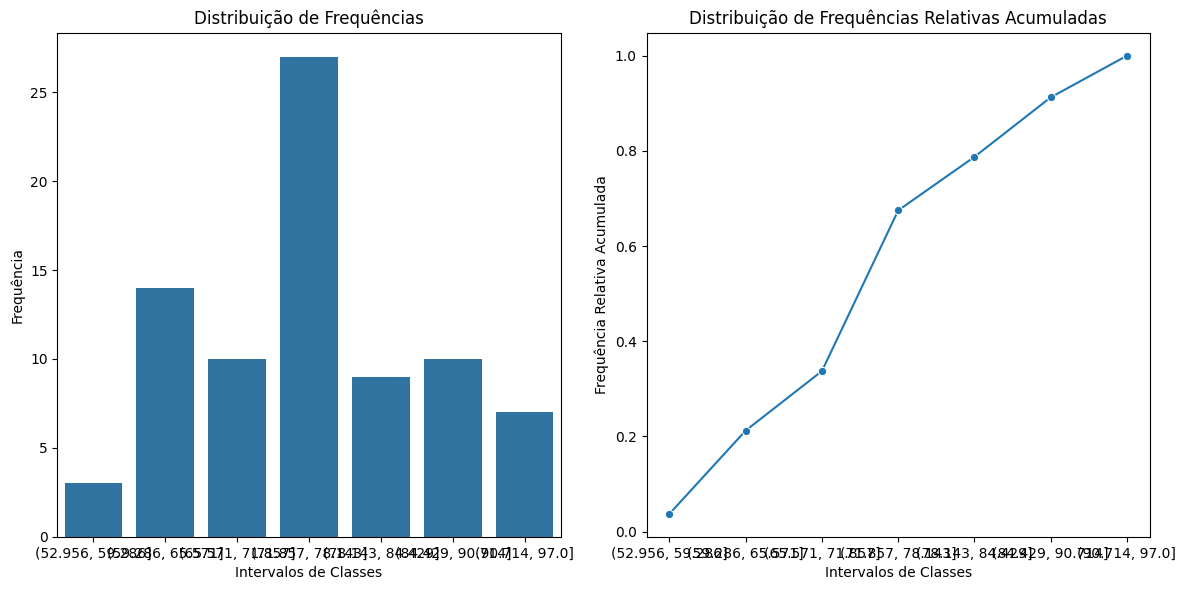

Moda: 75
Mediana: 75.0
Média: 75.25
Variância: 107.63
Desvio Padrão: 10.37


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados fornecidos
notas = [
    93, 76, 68, 84, 75, 82, 68, 90, 62, 88, 75, 85, 73, 79, 88, 73, 60, 93, 71, 59,
    72, 63, 61, 65, 75, 87, 74, 62, 95, 78, 60, 68, 66, 78, 82, 75, 94, 77, 69, 74,
    71, 83, 96, 78, 89, 61, 75, 95, 60, 79, 75, 71, 79, 62, 67, 97, 78, 85, 76, 65,
    74, 53, 65, 80, 73, 57, 88, 78, 62, 76, 77, 85, 86, 67, 73, 81, 72, 63, 76, 75
]

# a) Definir os intervalos para as classes
# Vamos definir as classes de forma que cada intervalo tenha a mesma amplitude
n_classes = 7  # Número de classes
intervalos = pd.cut(notas, bins=n_classes)

# b) Determinar moda, mediana, média, variância e desvio padrão
moda = pd.Series(notas).mode()[0]
mediana = np.median(notas)
media = np.mean(notas)
variancia = np.var(notas, ddof=1)  # ddof=1 para amostra
desvio_padrao = np.std(notas, ddof=1)

# c) Representar graficamente a distribuição de frequências e a distribuição de frequências relativas acumuladas
frequencias = pd.Series(intervalos).value_counts().sort_index()
frequencias_relativas = frequencias / len(notas)
frequencias_acumuladas = frequencias.cumsum()
frequencias_relativas_acumuladas = frequencias_relativas.cumsum()

# Plotando a distribuição de frequências
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=frequencias.index.astype(str), y=frequencias.values)
plt.title("Distribuição de Frequências")
plt.xlabel("Intervalos de Classes")
plt.ylabel("Frequência")

plt.subplot(1, 2, 2)
sns.lineplot(x=frequencias_relativas_acumuladas.index.astype(str), y=frequencias_relativas_acumuladas.values, marker='o')
plt.title("Distribuição de Frequências Relativas Acumuladas")
plt.xlabel("Intervalos de Classes")
plt.ylabel("Frequência Relativa Acumulada")

plt.tight_layout()
plt.show()

# Resultados
print(f"Moda: {moda}")
print(f"Mediana: {mediana}")
print(f"Média: {media:.2f}")
print(f"Variância: {variancia:.2f}")
print(f"Desvio Padrão: {desvio_padrao:.2f}")


No código acima:

1. Definição dos Intervalos para as Classes. Utilizamos a função pd.cut() para dividir as notas em intervalos de classes. O número de classes é definido como 7, mas pode ser ajustado conforme necessário.
2. Cálculo da Moda, Mediana, Média, Variância e Desvio Padrão.
- A moda é a nota mais frequente.
- A mediana é o valor central das notas.
- A média é a soma de todas as notas dividida pelo número de alunos.
- A variância mede a dispersão das notas em torno da média.
- O desvio padrão é a raiz quadrada da variância.

3. Representação Gráfica:
- A distribuição de frequências é representada por um gráfico de barras.
- A distribuição de frequências relativas acumuladas é representada por um gráfico de linhas.

## 3



In [4]:
import numpy as np
import pandas as pd
from scipy import stats

# Dados do número de faltas por dia
faltas = [
    0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 1, 8, 5, 0, 0, 4, 3, 0, 6, 2, 2, 3, 1, 1, 0, 
    1, 0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 6, 4, 3, 3, 1, 2, 4, 0, 0, 3, 1, 2, 0, 
    0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 4, 4, 0, 2, 2, 0, 2, 0, 0, 0
]

# a) Distribuição de frequências absolutas
frequencia_absoluta = pd.Series(faltas).value_counts().sort_index()
print("a) Distribuição de Frequências Absolutas:")
print(frequencia_absoluta)

# b) Número médio de faltas por dia
media_faltas = np.mean(faltas)
print(f"\nb) Número médio de faltas por dia: {media_faltas:.2f}")

# c) Mediana, variância e desvio padrão
mediana_faltas = np.median(faltas)
variancia_faltas = np.var(faltas, ddof=1)
desvio_padrao_faltas = np.std(faltas, ddof=1)
print(f"\nc) Mediana: {mediana_faltas:.2f}")
print(f"   Variância: {variancia_faltas:.2f}")
print(f"   Desvio Padrão: {desvio_padrao_faltas:.2f}")

# d) Verificar se a distribuição é unimodal
moda_faltas = stats.mode(faltas)
unimodal = (len(moda_faltas.mode) == 1)
print(f"\nd) A distribuição é unimodal?")
print(f"   Moda: {moda_faltas.mode[0]}")

# e) Percentagem de dias com mais de 3 faltas
dias_mais_3_faltas = np.sum(np.array(faltas) > 3)
percentagem_mais_3_faltas = (dias_mais_3_faltas / len(faltas)) * 100
print(f"\ne) Percentagem de dias com mais de 3 faltas: {percentagem_mais_3_faltas:.2f}%")

# f) Conclusões sobre a simetria da distribuição
assimetria = stats.skew(faltas)
if assimetria > 0:
    simetria_conclusao = "A distribuição é assimétrica à direita."
elif assimetria < 0:
    simetria_conclusao = "A distribuição é assimétrica à esquerda."
else:
    simetria_conclusao = "A distribuição é simétrica."
print(f"\nf) Conclusões sobre a simetria da distribuição: {simetria_conclusao}")

a) Distribuição de Frequências Absolutas:
0    29
1    13
2    12
3     7
4     5
5     1
6     2
8     1
dtype: int64

b) Número médio de faltas por dia: 1.47

c) Mediana: 1.00
   Variância: 3.09
   Desvio Padrão: 1.76

d) A distribuição é unimodal?
   Moda: 0

e) Percentagem de dias com mais de 3 faltas: 12.86%

f) Conclusões sobre a simetria da distribuição: A distribuição é assimétrica à direita.


/tmp/ipykernel_24785/2356773598.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda_faltas = stats.mode(faltas)


No código acima:

- A distribuição de frequências absolutas mostra quantas vezes cada número de faltas ocorreu durante o período de 70 dias.
- O número médio de faltas por dia é a média aritmética do conjunto de dados.
- A mediana, variância e desvio padrão fornecem uma visão das características centrais e da dispersão dos dados.
- A verificação de unimodalidade indica se a distribuição tem apenas um valor de moda (um pico).
- A percentagem de dias com mais de 3 faltas mostra a frequência relativa desse evento.
- A simetria da distribuição é analisada com base no coeficiente de assimetria (skewness), que indica a direção e a magnitude da assimetria.

## 4

a) Agrupamento dos Dados em Classes e Cálculo das Frequências
Os dados foram agrupados em 7 classes com base na regra de Sturges ($k = 1 + 3.322 \times \log_{10}(n)$), que é apropriada para uma amostra de 100 observações.

b) O código abaixo cria o histograma.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados fornecidos
data = [
    752, 755, 725, 753, 764, 738, 757, 744, 747, 754, 741, 750, 757, 745, 754, 750, 729, 742, 754, 747,
    755, 736, 744, 753, 721, 738, 732, 752, 745, 758, 740, 751, 746, 736, 741, 748, 735, 747, 727, 750,
    743, 750, 732, 749, 745, 736, 733, 741, 749, 743, 748, 749, 737, 737, 749, 740, 724, 753, 738, 752,
    747, 735, 743, 751, 726, 749, 741, 751, 745, 754, 753, 745, 749, 731, 746, 737, 741, 728, 750, 747,
    747, 740, 741, 730, 739, 754, 739, 744, 755, 748, 759, 750, 756, 740, 745, 742, 730, 736, 750, 754
]

# a) Agrupamento em classes e cálculo das frequências
# Decidimos adotar 7 classes com base na regra de Sturges (k = 1 + 3.322 * log(n))
k = int(1 + 3.322 * np.log10(len(data)))

# Criando os intervalos de classes e suas frequências
freq_table = pd.cut(data, bins=k, right=False).value_counts().sort_index()

# Calculando as frequências relativas
freq_table_rel = freq_table / len(data)

# Exibindo a tabela de frequências absolutas e relativas
freq_table_df = pd.DataFrame({'Frequência Absoluta': freq_table, 'Frequência Relativa (%)': freq_table_rel * 100})
freq_table_df.index.name = 'Intervalo de Peso (g)'

freq_table_df


,Frequência Absoluta,Frequência Relativa (%)
Intervalo de Peso (g),,
"[721.0, 727.143)",5,5.0
"[727.143, 733.286)",8,8.0
"[733.286, 739.429)",14,14.0
"[739.429, 745.571)",24,24.0
"[745.571, 751.714)",27,27.0
"[751.714, 757.857)",19,19.0
"[757.857, 764.043)",3,3.0


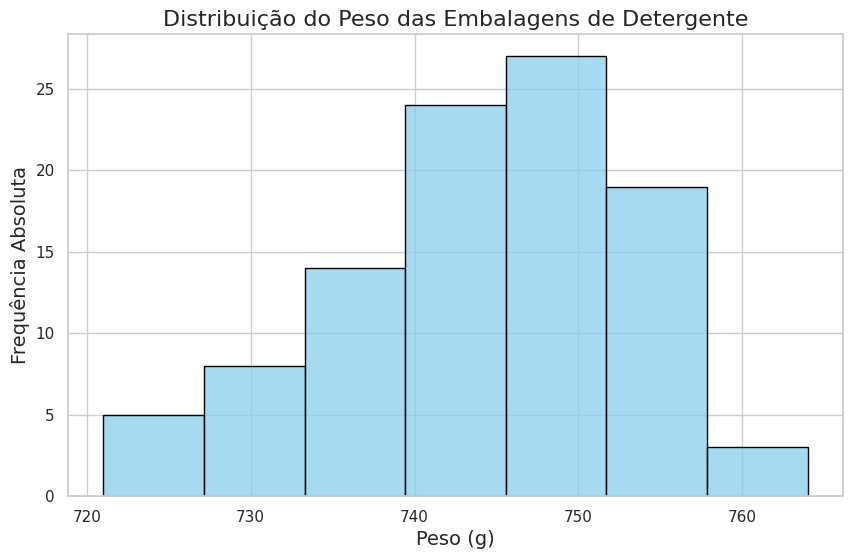

In [6]:
# Configuração para o estilo do gráfico
sns.set(style="whitegrid")

# Criando o histograma
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=k, kde=False, color='skyblue', edgecolor='black')

# Adicionando títulos e rótulos
plt.title('Distribuição do Peso das Embalagens de Detergente', fontsize=16)
plt.xlabel('Peso (g)', fontsize=14)
plt.ylabel('Frequência Absoluta', fontsize=14)

# Exibindo o gráfico
plt.show()


c) Cálculo das Medidas Amostrais de Localização e Dispersão

Agora, vamos calcular as principais medidas amostrais, como média, mediana, moda, variância, desvio padrão, e amplitude dos dados fornecidos.

In [8]:
from scipy import stats

# Cálculo das medidas de localização
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)[0][0]

# Cálculo das medidas de dispersão
variance = np.var(data, ddof=1)
std_dev = np.std(data, ddof=1)
range_ = np.ptp(data)

# Exibindo os resultados
location_dispersion_measures = {
    'Média (g)': mean,
    'Mediana (g)': median,
    'Moda (g)': mode,
    'Variância (g²)': variance,
    'Desvio Padrão (g)': std_dev,
    'Amplitude (g)': range_
}

location_dispersion_measures


/tmp/ipykernel_24785/1920211051.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(data)[0][0]


{'Média (g)': 744.29,
 'Mediana (g)': 745.0,
 'Moda (g)': 750,
 'Variância (g²)': 77.21808080808083,
 'Desvio Padrão (g)': 8.787381908627895,
 'Amplitude (g)': 43}